<a href="https://colab.research.google.com/github/aaanthonyyy/3020-project/blob/master/notebooks/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q keras-nightly
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from google.colab import drive
drive.mount('/content/gdrive')

tf.__version__

# Data Parameters
batch_size = 512

# Image Parameters
img_height, img_width = 64, 64

data_dir = pathlib.Path('/content/gdrive/My Drive/Colab Notebooks/Minjie Chen/PowerVision/component')

# Loading training dataset from Drive
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Mounted at /content/gdrive
Found 2561 files belonging to 11 classes.
Using 2049 files for training.


In [ ]:
# Loading validation dataset
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  label_mode="int",
  batch_size=512)

class_names = train_ds.class_names
print('Number of Classes:',len(class_names))
print(class_names)

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
regularization = 0.0005

Found 2561 files belonging to 11 classes.
Using 512 files for validation.
Number of Classes: 11
['ac_src', 'battery', 'cap', 'curr_src', 'diode', 'inductor', 'resistor', 'swi_ideal', 'swi_real', 'volt_src', 'xformer']


In [ ]:
from keras import layers
from keras import regularizers

model = keras.Sequential([

  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
  layers.Rescaling(1./255),

  layers.Conv2D(64, 4, activation='relu', kernel_regularizer="l2"),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 5, activation='relu', kernel_regularizer="l2"),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 5, activation='relu', kernel_regularizer="l2"),
  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(64, activation='relu', kernel_regularizer="l2"),

  layers.Dense(64, activation='relu', kernel_regularizer="l2"),

  layers.Dense(len(class_names), activation='softmax', kernel_regularizer="l2")
])

model.compile(
  optimizer=keras.optimizers.Adam(),
  loss=keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    ignore_class=None,
    reduction='sum_over_batch_size',
    name='sparse_categorical_crossentropy'),
  metrics=['accuracy'])

history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=2000)

Epoch 1/2000
5/5 [==============================] - 7s 284ms/step - loss: 5.4837 - accuracy: 0.1581 - val_loss: 5.0263 - val_accuracy: 0.1602
Epoch 2/2000
5/5 [==============================] - 0s 25ms/step - loss: 4.9133 - accuracy: 0.1684 - val_loss: 4.5844 - val_accuracy: 0.1895
Epoch 3/2000
5/5 [==============================] - 0s 26ms/step - loss: 4.5047 - accuracy: 0.1957 - val_loss: 4.2234 - val_accuracy: 0.2695
Epoch 4/2000
5/5 [==============================] - 0s 25ms/step - loss: 4.1892 - accuracy: 0.2040 - val_loss: 3.9928 - val_accuracy: 0.1855
Epoch 5/2000
5/5 [==============================] - 0s 24ms/step - loss: 3.9711 - accuracy: 0.1542 - val_loss: 3.7480 - val_accuracy: 0.2266
Epoch 6/2000
5/5 [==============================] - 0s 24ms/step - loss: 3.7131 - accuracy: 0.2128 - val_loss: 3.5435 - val_accuracy: 0.2773
Epoch 7/2000
5/5 [==============================] - 0s 24ms/step - loss: 3.5068 - accuracy: 0.2714 - val_loss: 3.3745 - val_accuracy: 0.2559
Epoch 8/2000

Text(0.5, 0, 'EPOCH')

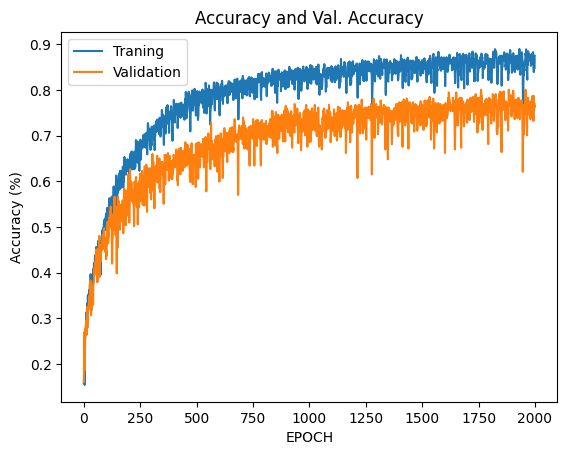

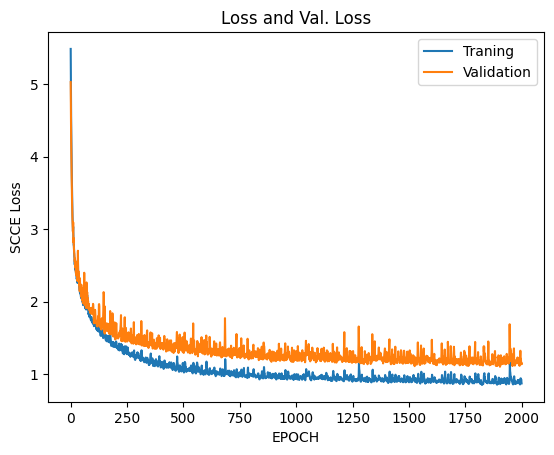

In [ ]:
plt.subplots(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy and Val. Accuracy")
plt.legend(["Traning", "Validation"])
plt.ylabel("Accuracy (%)")
plt.xlabel("EPOCH")
plt.subplots(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Traning", "Validation"])
plt.title("Loss and Val. Loss")
plt.ylabel("SCCE Loss")
plt.xlabel("EPOCH")

In [ ]:
model.save('/content/gdrive/My Drive/Colab Notebooks/Minjie Chen/PowerVision/models/model.keras')

In [ ]:
model = keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/Minjie Chen/PowerVision/models/model.keras')

In [ ]:
from sklearn import metrics

model.summary()
model.evaluate(val_ds,  batch_size=512, verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 64, 64, 1)         0         
                                                                 
 random_rotation_5 (RandomR  (None, 64, 64, 1)         0         
 otation)                                                        
                                                                 
 rescaling_5 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 64)        1088      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 64)       

[1.3013951778411865, 0.71484375]

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.array(y)])

cm = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

16/16 [==============================] - 0s 2ms/step


Confusion matrix, without normalization


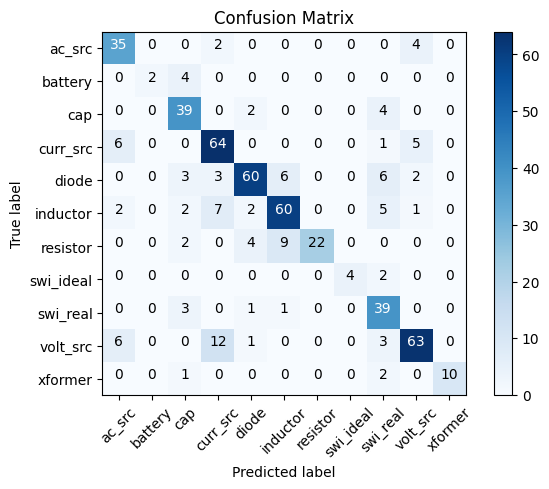

In [ ]:
class_names = ['ac_src', 'battery', 'cap', 'curr_src', 'diode', 'inductor', 'resistor', 'swi_ideal', 'swi_real', 'volt_src', 'xformer']

plot_confusion_matrix(cm=cm, classes=class_names, title='Confusion Matrix',)

In [ ]:
print(metrics.classification_report(y_true=labels, y_pred=predictions))

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.78        41
         1.0       1.00      0.33      0.50         6
         2.0       0.72      0.87      0.79        45
         3.0       0.73      0.84      0.78        76
         4.0       0.86      0.75      0.80        80
         5.0       0.79      0.76      0.77        79
         6.0       1.00      0.59      0.75        37
         7.0       1.00      0.67      0.80         6
         8.0       0.63      0.89      0.74        44
         9.0       0.84      0.74      0.79        85
        10.0       1.00      0.77      0.87        13

    accuracy                           0.78       512
   macro avg       0.84      0.73      0.76       512
weighted avg       0.80      0.78      0.78       512



In [ ]:
# metrics for previous work done
class_names = ['ac_src', 'battery', 'cap', 'curr_src', 'diode', 'inductor', 'resistor', 'swi_ideal', 'swi_real', 'volt_src', 'xformer']
f1 = lambda precision, recall: round(2*(precision*recall)/(precision+recall),2)